In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from os import system
res = []
for nbThreads in range(1,9):
    for nbIndis in [32,64,128]:
        # !OMP_NUM_THREADS={nbThread} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis} > /dev/null
        cmd = 'OMP_NUM_THREADS={nbThreads} ./micro_aevol_cpu -w {nbIndis} -h {nbIndis}'.format(nbThreads=nbThreads, nbIndis=nbIndis)
        system(cmd)
        d = pd.read_csv('trace.csv')
        d = d[1:]
        dur_per_gen = d['Duration']
        sum = dur_per_gen.sum()
        res.append([sum, nbThreads, nbIndis])
        print(nbThreads, sum)

In [46]:
res = pd.read_csv('proportional_static.csv')

In [47]:
res

,0,duration,nbThreads,nbIndis,duration_one_thread
0,1,2595724521,1,750,2502320141
1,2,2039699402,2,1500,3348399255
2,3,2818839612,3,2250,5539697117
3,4,3933737838,4,3000,10311472104
4,5,3413192532,5,3750,8875495916
5,6,4507670606,6,4500,12356757277
6,7,5902457706,7,5250,18212241122
7,8,6184797653,8,6000,19766421576


Text(0.5, 1.0, 'Duration of the evolution based on number of Threads')

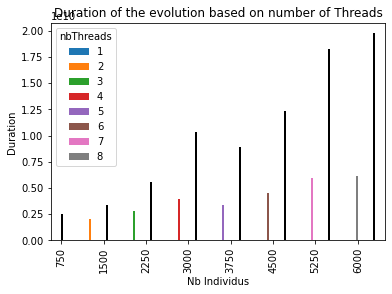

In [48]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
ax = res.pivot(index='nbIndis', columns='nbThreads', values='duration').plot(kind='bar', width=0.4, position=1, ax=ax)
res.pivot(index='nbIndis', columns='nbThreads', values='duration_one_thread').plot(kind='bar', width=0.4, position=0, ax=ax, legend=False, color="black")
ax.set_ylabel('Duration')
ax.set_xlabel('Nb Individus')
ax.set_title('Duration of the evolution based on number of Threads')